# IOT based Health Monitoring System using Different types of Machine Learning Algorithm.
# 採監督式學習（有給答案）

# Package Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Reading

In [2]:
Input_data = pd.read_csv("dataset.csv")
Input_data

,SI.No,user id,temperature,Heart Rate,SPO2,target
0,1,1,34.0,30,94,0
1,2,1,34.1,31,93,0
2,3,1,34.2,32,92,0
3,4,1,34.3,33,91,0
4,5,1,34.4,34,90,0
...,...,...,...,...,...,...
472,473,2,39.0,114,88,0
473,474,3,35.5,113,89,0
474,475,6,34.9,98,92,0
475,476,7,36.4,102,85,0


# Data PreProcessing

In [3]:
Input_data.head()

,SI.No,user id,temperature,Heart Rate,SPO2,target
0,1,1,34.0,30,94,0
1,2,1,34.1,31,93,0
2,3,1,34.2,32,92,0
3,4,1,34.3,33,91,0
4,5,1,34.4,34,90,0


In [4]:
Input_data.tail()

,SI.No,user id,temperature,Heart Rate,SPO2,target
472,473,2,39.0,114,88,0
473,474,3,35.5,113,89,0
474,475,6,34.9,98,92,0
475,476,7,36.4,102,85,0
476,477,3,39.8,86,90,0


In [5]:
Input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SI.No        477 non-null    int64  
 1   user id      477 non-null    int64  
 2   temperature  477 non-null    float64
 3   Heart Rate   477 non-null    int64  
 4   SPO2         477 non-null    int64  
 5   target       477 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 22.5 KB


In [6]:
Input_data.isnull().sum()

SI.No          0
user id        0
temperature    0
Heart Rate     0
SPO2           0
target         0
dtype: int64

In [7]:
Input_data['target'].value_counts()

0    300
2    140
1     37
Name: target, dtype: int64

In [8]:
Input_data.shape

(477, 6)

<Axes: >

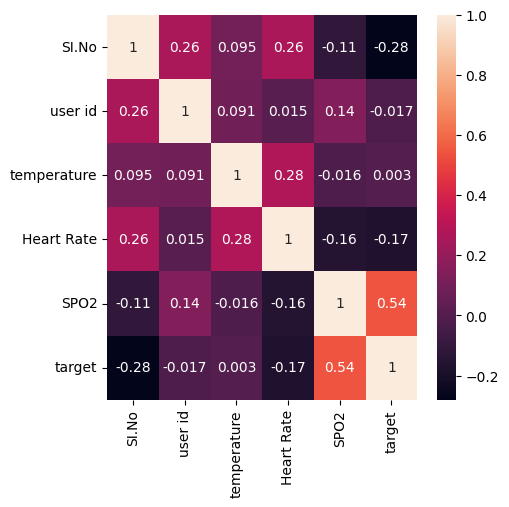

In [9]:
import seaborn as sns
corr = Input_data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True)

# Model Implementation

In [1]:
X = Input_data.drop(['target', 'SI.No', 'user id'], axis=1)
X

NameError: name 'Input_data' is not defined

In [11]:
Y = Input_data['target']
Y 

0      0
1      0
2      0
3      0
4      0
      ..
472    0
473    0
474    0
475    0
476    0
Name: target, Length: 477, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)

In [13]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
NB_Algorithm = MultinomialNB()
NB_Algorithm.fit(x_train1, y_train1)
NB_Algorithm_Prediction = NB_Algorithm.predict(x_test1)
Accuracy_NB = metrics.accuracy_score(y_test1, NB_Algorithm_Prediction)
print('Accuracy of Naive Bayes Algorithm', Accuracy_NB)

Accuracy of Naive Bayes Algorithm 0.5208333333333334


In [14]:
NB_Algorithm_Prediction

array([0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 2, 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.70      0.57      0.63        67
           1       0.00      0.00      0.00         4
           2       0.29      0.48      0.36        25

    accuracy                           0.52        96
   macro avg       0.33      0.35      0.33        96
weighted avg       0.57      0.52      0.53        96



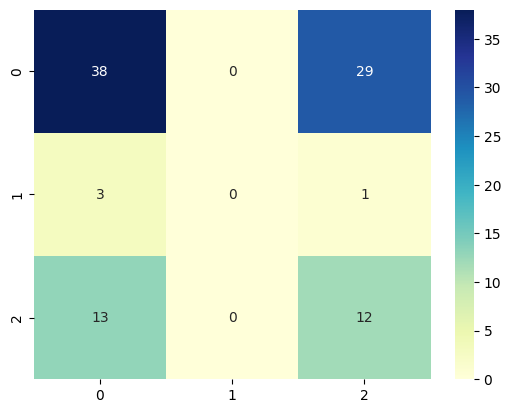

In [15]:
# 顯示混淆矩陣和分類報告
from sklearn.metrics import classification_report, confusion_matrix
CM_NB=confusion_matrix(y_test1, NB_Algorithm_Prediction)
sns.heatmap(CM_NB, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, NB_Algorithm_Prediction))

# Decision Tree Algorithm

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_Algorithm = DecisionTreeClassifier()
DT_Algorithm.fit(x_train1, y_train1)
DT_Algorithm_Prediction = DT_Algorithm.predict(x_test1)
Accuracy_DT = accuracy_score(y_test1, DT_Algorithm_Prediction)
print('Accuracy of Decision Tree Algorithm', Accuracy_DT)

Accuracy of Decision Tree Algorithm 0.9895833333333334


In [17]:
DT_Algorithm_Prediction

array([0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00        25

    accuracy                           0.99        96
   macro avg       1.00      0.92      0.95        96
weighted avg       0.99      0.99      0.99        96



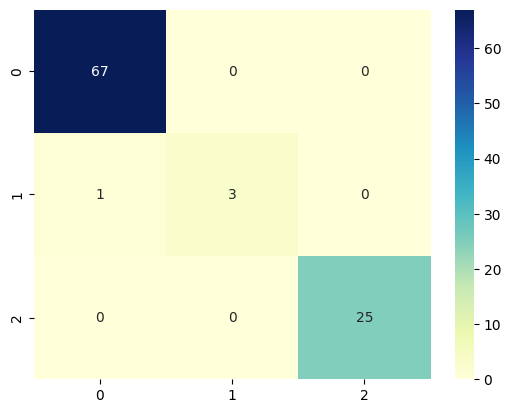

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
CM_DT=confusion_matrix(y_test1, DT_Algorithm_Prediction)
sns.heatmap(CM_DT, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, DT_Algorithm_Prediction))

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_Algorithm = RandomForestClassifier()
RF_Algorithm.fit(x_train1, y_train1)
RF_Algorithm_Prediction = RF_Algorithm.predict(x_test1)
Accuracy_RF = accuracy_score(y_test1, RF_Algorithm_Prediction)
print('Accuracy of Random Forest Algorithm', Accuracy_RF)

Accuracy of Random Forest Algorithm 0.9791666666666666


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00        25

    accuracy                           0.98        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.98      0.98      0.98        96



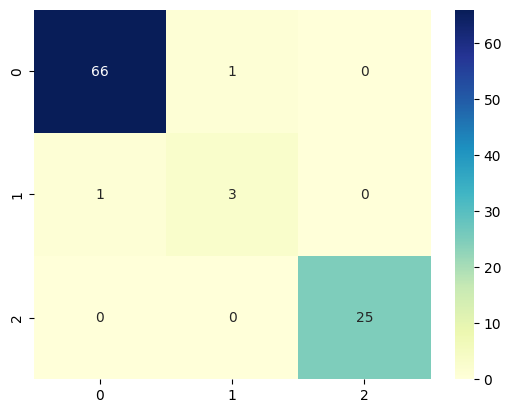

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
CM_RF=confusion_matrix(y_test1, RF_Algorithm_Prediction)
sns.heatmap(CM_RF, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, RF_Algorithm_Prediction))

In [21]:
from sklearn.linear_model import LogisticRegression
LR_Algorithm = LogisticRegression()
LR_Algorithm.fit(x_train1, y_train1)
LR_Algorithm_Prediction = LR_Algorithm.predict(x_test1)
Accuracy_LR = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Logistic Regression Algorithm', Accuracy_LR)

Accuracy of Logistic Regression Algorithm 0.7604166666666666


In [22]:
LR_Algorithm_Prediction

array([0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        67
           1       0.00      0.00      0.00         4
           2       0.54      0.60      0.57        25

    accuracy                           0.76        96
   macro avg       0.46      0.49      0.48        96
weighted avg       0.73      0.76      0.75        96



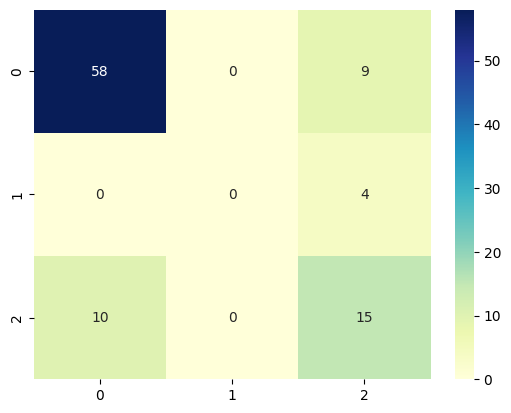

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
CM_LR=confusion_matrix(y_test1, LR_Algorithm_Prediction)
sns.heatmap(CM_LR, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, LR_Algorithm_Prediction))

In [24]:
from sklearn.svm import SVC
SVM_Algorithm = SVC()
SVM_Algorithm.fit(x_train1, y_train1)
SVM_Algorithm_Prediction = SVM_Algorithm.predict(x_test1)
Accuracy_SVM = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Support Vector Machine Algorithm', Accuracy_SVM)

Accuracy of Support Vector Machine Algorithm 0.7604166666666666


In [25]:
SVM_Algorithm_Prediction

array([0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        67
           1       0.00      0.00      0.00         4
           2       0.71      1.00      0.83        25

    accuracy                           0.85        96
   macro avg       0.55      0.62      0.57        96
weighted avg       0.84      0.85      0.84        96



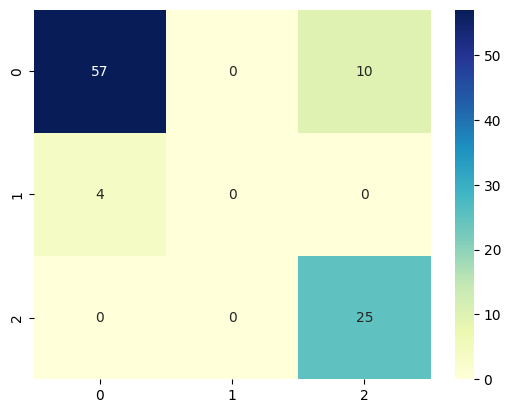

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
CM_SVM=confusion_matrix(y_test1, SVM_Algorithm_Prediction)
sns.heatmap(CM_SVM, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, SVM_Algorithm_Prediction))

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Algorithm = KNeighborsClassifier()
KNN_Algorithm.fit(x_train1, y_train1)
KNN_Algorithm_Prediction = KNN_Algorithm.predict(x_test1)
Accuracy_KNN = accuracy_score(y_test1, KNN_Algorithm_Prediction)
print('Accuracy of k-Nearest Neighbors algorithm', Accuracy_KNN)

Accuracy of k-Nearest Neighbors algorithm 0.8854166666666666


              precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.50      0.50      0.50         4
           2       0.80      0.96      0.87        25

    accuracy                           0.89        96
   macro avg       0.75      0.78      0.76        96
weighted avg       0.89      0.89      0.89        96



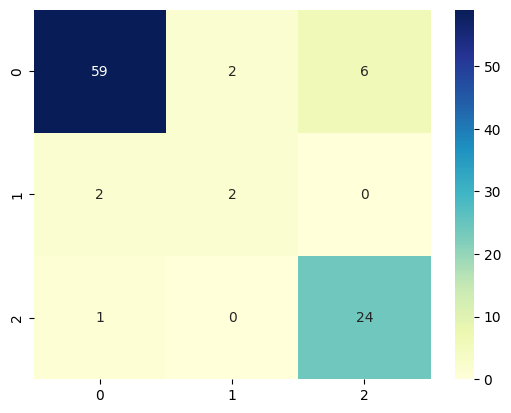

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
CM_KNN=confusion_matrix(y_test1, KNN_Algorithm_Prediction)
sns.heatmap(CM_KNN, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, KNN_Algorithm_Prediction))

Text(0.5, 1.0, 'Comparison Graph of all the Algorithm')

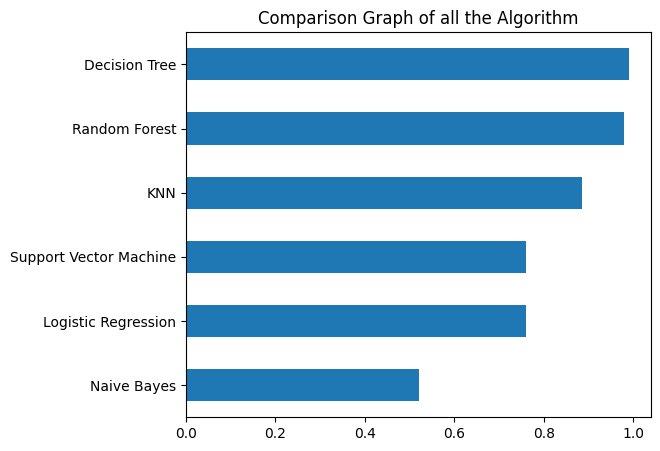

In [29]:
# 建立長條圖比較各個演算法的正確率
model_accuracy = pd.Series(data=[Accuracy_NB,Accuracy_DT,Accuracy_RF,Accuracy_LR,Accuracy_SVM,Accuracy_KNN], 
                index=['Naive Bayes','Decision Tree','Random Forest','Logistic Regression','Support Vector Machine','KNN'])
fig= plt.figure(figsize=(6,5))
model_accuracy.sort_values().plot.barh()
plt.title('Comparison Graph of all the Algorithm')

# Final Prediction Model

# import firebase

In [30]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# Fetch the service account key JSON file contents
cred = credentials.Certificate("your")
# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'your_databaseURL'
})

In [31]:
import time
# Create a reference to the database
ref = db.reference()
low = 'condition low'
medium = 'condition medium'
high = 'condition high'

# Read data from the database
while True:
    data = ref.get()
    if data:
        # 提取所需的数据并以[temp, heart rate, spo2]的形式输出
        Final_Prediction_data = [data.get('temp'), data.get('heart rate'), data.get('spo2')]
        Final_Prediction_data2 = np.array(Final_Prediction_data)
        Final_Prediction_data2 = Final_Prediction_data2.reshape(1,-1)
        Final_prediction = DT_Algorithm.predict(Final_Prediction_data2)
        
        if Final_prediction == 0:
            print(Final_Prediction_data,": 請留意您的身體狀況")
            data1 = {'condition':'請留意您的身體狀況'}
        elif Final_prediction == 1:
            print(Final_Prediction_data,": 狀態正常")
            data1 = {'condition':'狀態正常'}
        else:
            print(Final_Prediction_data,": 狀態良好")
            data1 = {'condition':'狀態良好'}
        ref.update(data1)
        
    time.sleep(5)

[34.0, 23, 96] : 請留意您的身體狀況
[33.9, 23, 96] : 請留意您的身體狀況
[33.9, 23, 96] : 請留意您的身體狀況
[33.9, 23, 96] : 請留意您的身體狀況


KeyboardInterrupt: 